<h2 align="left"><font color=#854720>Let's get started:</font></h2>

<a id="import"></a>
# <p style="background-color:#9eb413; font-family:calibri; color: #854720; font-size:150%; text-align:center; border-radius:15px 50px;">Step 1 | Import Libraries</p>


In [7]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import geopandas as gpd
import plotly.express as px

In [8]:
class colorss:
    yellows=['#ffffd4','#fee391','#fec44f','#fe9929','#d95f0e','#993404','#a70000','#ff5252','#ff7b7b','#ffbaba']
    greens=['#ffffd4','#fee391','#fec44f','#fe9929','#d9f0a3','#addd8e','#78c679','#41ab5d','#238443','#005a32']
cmaps=['flare','icefire','bwr_r','Accent','Spectral','RdGy','afmhot_r','afmhot','inferno','seismic','vlag','vlag_r']

<a id="read"></a>
# <p style="background-color:#9eb413 ; font-family:calibri; color:#854720; font-size:150%; text-align:center; border-radius:15px 50px;">Step 2 | Read Dataset</p>


In [9]:
df=pd.read_csv("/kaggle/input/crop-yield-prediction-dataset/yield_df.csv")

In [10]:
df

Unnamed: 0      Area            Item  Year  hg/ha_yield  \
0               0   Albania           Maize  1990        36613   
1               1   Albania        Potatoes  1990        66667   
2               2   Albania     Rice, paddy  1990        23333   
3               3   Albania         Sorghum  1990        12500   
4               4   Albania        Soybeans  1990         7000   
...           ...       ...             ...   ...          ...   
28237       28237  Zimbabwe     Rice, paddy  2013        22581   
28238       28238  Zimbabwe         Sorghum  2013         3066   
28239       28239  Zimbabwe        Soybeans  2013        13142   
28240       28240  Zimbabwe  Sweet potatoes  2013        22222   
28241       28241  Zimbabwe           Wheat  2013        22888   

       average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  
0                             1485.0             121.00     16.37  
1                             1485.0             121.00     16.37  
2                             1485.0             121.00     16.37  
3                             1485.0             121.00     16.37  
4                             1485.0             121.00     16.37  
...                              ...                ...       ...  
28237                          657.0            2550.07     19.76  
28238                          657.0            2550.07     19.76  
28239                          657.0            2550.07     19.76  
28240                          657.0            2550.07     19.76  
28241                          657.0            2550.07     19.76  

[28242 rows x 8 columns]

<div style="border-radius:10px; padding: 15px; background-color: #854720; font-size:120%; text-align:left">

<h2 align="left"><font color=#9eb413>Dataset Description:</font></h2>
    
| __Variable__ | __Description__ |
|     :---      |       :---      |      
| __Area__ | Country names that plant crops |
| __Item__ | Types of crops planted |
| __Year__ | Time of planted crops in years 1990-2013 |
| __average_rain_fall_mm_per_year__ | Average rain fall per year |
| __pesticides_tonnes__ | Pesticides used in tonnes |                     
| __avg_temp__ | Average temperature |
| __hg/ha_yield__ | Crops yield production value in hectogram per hectare (Hg/Ha) |  

<a id="overview"></a>
# <p style="background-color:#9eb413; font-family:calibri; color:#854720; font-size:150%; text-align:center; border-radius:15px 50px;">Step 3 | Dataset Overview</p>


<a id="basic"></a>
# <b><span style='color: #9eb413'>Step 3.1 |</span><span style='color:#854720'> Dataset Basic Information</span></b>

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     28242 non-null  int64  
 1   Area                           28242 non-null  object 
 2   Item                           28242 non-null  object 
 3   Year                           28242 non-null  int64  
 4   hg/ha_yield                    28242 non-null  int64  
 5   average_rain_fall_mm_per_year  28242 non-null  float64
 6   pesticides_tonnes              28242 non-null  float64
 7   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.7+ MB


<div style="border-radius:10px; padding: 15px; background-color: #854720; font-size:115%; text-align:left">

<h2 align="left"><font color=#9eb413>Inferences:</font></h2>

* __Number of Entries__: The dataset consists of __28242 entries__, ranging from index 0 to 28241.
    
    
* __Columns__: There are __8 columns__ in the dataset.
    
    
* __Data Types__:
    - Most of the columns (6 out of 8) are of the __int64__ & __float64__ data type.
    - Only the Item and Area columns are of the object data type.
    
    
* __Missing Values__: There doesn't appear to be any missing values in the dataset as each column has 28242 non-null entries.

<a id="num_statistics"></a>
# <b><span style='color:#9eb413'>Step 3.2 |</span><span style='color:#854720'> Summary Statistics for Numerical Variables</span></b>

In [12]:
df.describe().T

count          mean           std      min  \
Unnamed: 0                     28242.0  14120.500000   8152.907488     0.00   
Year                           28242.0   2001.544296      7.051905  1990.00   
hg/ha_yield                    28242.0  77053.332094  84956.612897    50.00   
average_rain_fall_mm_per_year  28242.0   1149.055980    709.812150    51.00   
pesticides_tonnes              28242.0  37076.909344  59958.784665     0.04   
avg_temp                       28242.0     20.542627      6.312051     1.30   

                                      25%       50%        75%        max  
Unnamed: 0                      7060.2500  14120.50   21180.75   28241.00  
Year                            1995.0000   2001.00    2008.00    2013.00  
hg/ha_yield                    19919.2500  38295.00  104676.75  501412.00  
average_rain_fall_mm_per_year    593.0000   1083.00    1668.00    3240.00  
pesticides_tonnes               1702.0000  17529.44   48687.88  367778.00  
avg_temp                          16.7025     21.51      26.00      30.65

 <div style="border-radius:10px; padding: 15px; background-color:#854720 ; font-size:115%; text-align:left;">

<h3 align="left"><font color=#9eb413>Numerical Features:</font></h3>

* __`average_rain_fall_mm_per_year`__: The average rainfall per year is approximately 1149, with the least rainfall being 51 and the most 3240.
* __`pesticides_tonnes`__: The mean pesticides used in tonnes is a whopping 37077 tonnes, with minimum as little as 0.04 and maximum as huge as 367778 tonnes.
* __`hg/ha_yield`__: The average crop production yield is 77053.3. Ranging from 50 all the way to 501412 hectograms per hectare.

<a id="cat_statistics"></a>
# <b><span style='color:#9eb413'>Step 3.3 |</span><span style='color:#854720'> Summary Statistics for Categorical  Variables</span></b>

In [13]:
df.describe(include='object')

Area      Item
count   28242     28242
unique    101        10
top     India  Potatoes
freq     4048      4276

<div style="border-radius:10px; padding: 15px; background-color: #854720; font-size:115%; text-align:left">

<h3 align="left"><font color=#9eb413>Categorical Features (object data type):</font></h3>

* __`Area`__: There are **101** unique countries/areas, with **India** being the most frequent category, occurring **4048** times out of **28242** entries.
* __`Item`__: **10** unique types of crops are present. The most common type is "__Potatoes__", occurring **4276** times.

<a id="eda"></a>
# <p style="background-color:#9eb413; font-family:calibri; color:#854720; font-size:150%; text-align:center; border-radius:15px 50px;">Step 4 | EDA</p>


In [14]:
df.drop("Unnamed: 0", axis=1,inplace=True)
df

Area            Item  Year  hg/ha_yield  \
0       Albania           Maize  1990        36613   
1       Albania        Potatoes  1990        66667   
2       Albania     Rice, paddy  1990        23333   
3       Albania         Sorghum  1990        12500   
4       Albania        Soybeans  1990         7000   
...         ...             ...   ...          ...   
28237  Zimbabwe     Rice, paddy  2013        22581   
28238  Zimbabwe         Sorghum  2013         3066   
28239  Zimbabwe        Soybeans  2013        13142   
28240  Zimbabwe  Sweet potatoes  2013        22222   
28241  Zimbabwe           Wheat  2013        22888   

       average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  
0                             1485.0             121.00     16.37  
1                             1485.0             121.00     16.37  
2                             1485.0             121.00     16.37  
3                             1485.0             121.00     16.37  
4                             1485.0             121.00     16.37  
...                              ...                ...       ...  
28237                          657.0            2550.07     19.76  
28238                          657.0            2550.07     19.76  
28239                          657.0            2550.07     19.76  
28240                          657.0            2550.07     19.76  
28241                          657.0            2550.07     19.76  

[28242 rows x 7 columns]

In [15]:
# remove countries with less than 100 record
country_counts =df['Area'].value_counts()
countries_to_drop = country_counts[country_counts < 100].index.tolist()
df_filtered = df[~df['Area'].isin(countries_to_drop)]
df = df_filtered.reset_index(drop=True)

In [16]:
df

Area            Item  Year  hg/ha_yield  \
0       Algeria           Maize  1990        16500   
1       Algeria        Potatoes  1990        78936   
2       Algeria     Rice, paddy  1990        28000   
3       Algeria         Sorghum  1990        16571   
4       Algeria           Wheat  1990         6315   
...         ...             ...   ...          ...   
26292  Zimbabwe     Rice, paddy  2013        22581   
26293  Zimbabwe         Sorghum  2013         3066   
26294  Zimbabwe        Soybeans  2013        13142   
26295  Zimbabwe  Sweet potatoes  2013        22222   
26296  Zimbabwe           Wheat  2013        22888   

       average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  
0                               89.0            1828.92     17.48  
1                               89.0            1828.92     17.48  
2                               89.0            1828.92     17.48  
3                               89.0            1828.92     17.48  
4                               89.0            1828.92     17.48  
...                              ...                ...       ...  
26292                          657.0            2550.07     19.76  
26293                          657.0            2550.07     19.76  
26294                          657.0            2550.07     19.76  
26295                          657.0            2550.07     19.76  
26296                          657.0            2550.07     19.76  

[26297 rows x 7 columns]

In [17]:
datacorr=df.copy()

In [18]:
from sklearn.preprocessing import LabelEncoder
categorical_columns = datacorr.select_dtypes(include=['object']).columns.tolist()
label_encoder = LabelEncoder()
for column in categorical_columns:
    datacorr[column] = label_encoder.fit_transform(datacorr[column])

<Axes: >

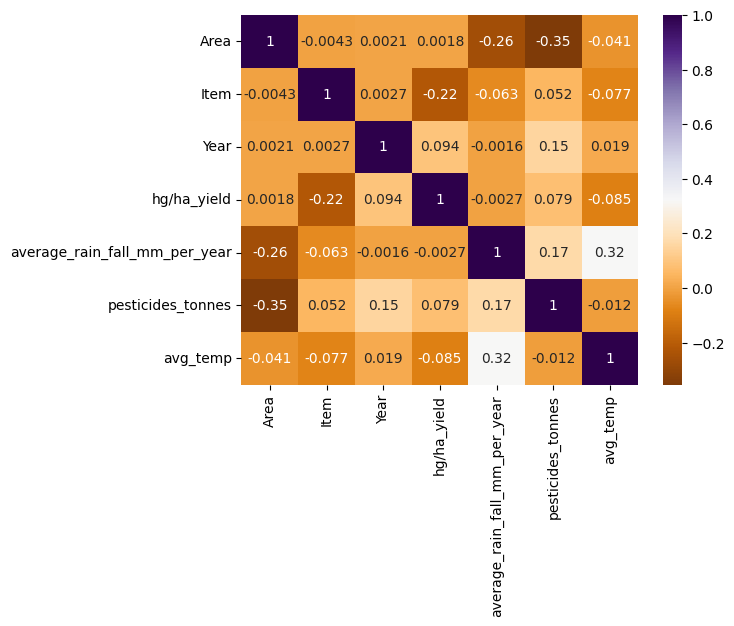

In [19]:
sns.heatmap(datacorr.corr() , annot= True , cmap='PuOr')

<div style="border-radius:10px; padding: 15px; background-color: #854720; font-size:115%; text-align:left">

<h2 align="left"><font color=#9eb413>Inferences:</font></h2>

* __Area__: There's a strong correlation between __Area__ and __pesticides_tonnes__, along with __Area__ and __average rainfall__
    
    
* __Items__: There's a strong correlation between __Item__ and __hg/ha_yield__
    

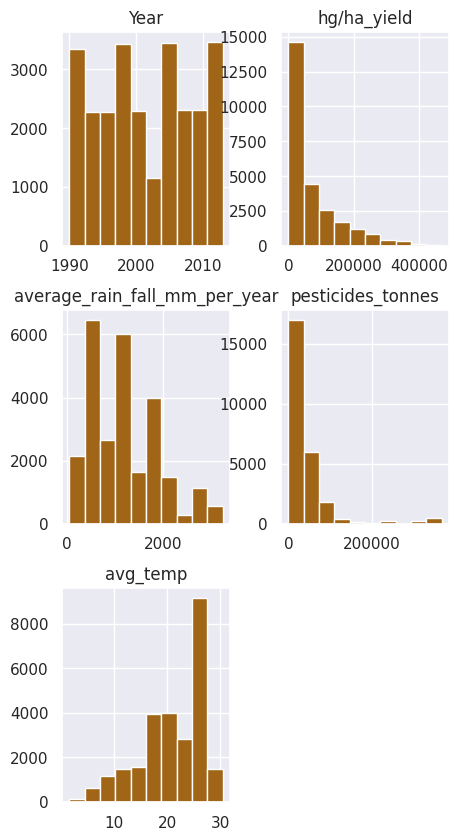

In [20]:
sns.set(palette='BrBG')
df.hist(figsize=(5,10));

<div style="border-radius:10px; padding: 15px; background-color: #854720; font-size:115%; text-align:left">

<h2 align="left"><font color=#9eb413>Inferences:</font></h2>

* __rainfall__: Most rainfall is between __0-1000__ and very few is around __3000__
    
    
* __pesticides_tonnes__: The majority of used pesticides is __little to zero__
* __avg_temp__: Most average temperatures is around 25.
*__hg/ha yield__: There is a vast majority of yield production around 0.
    

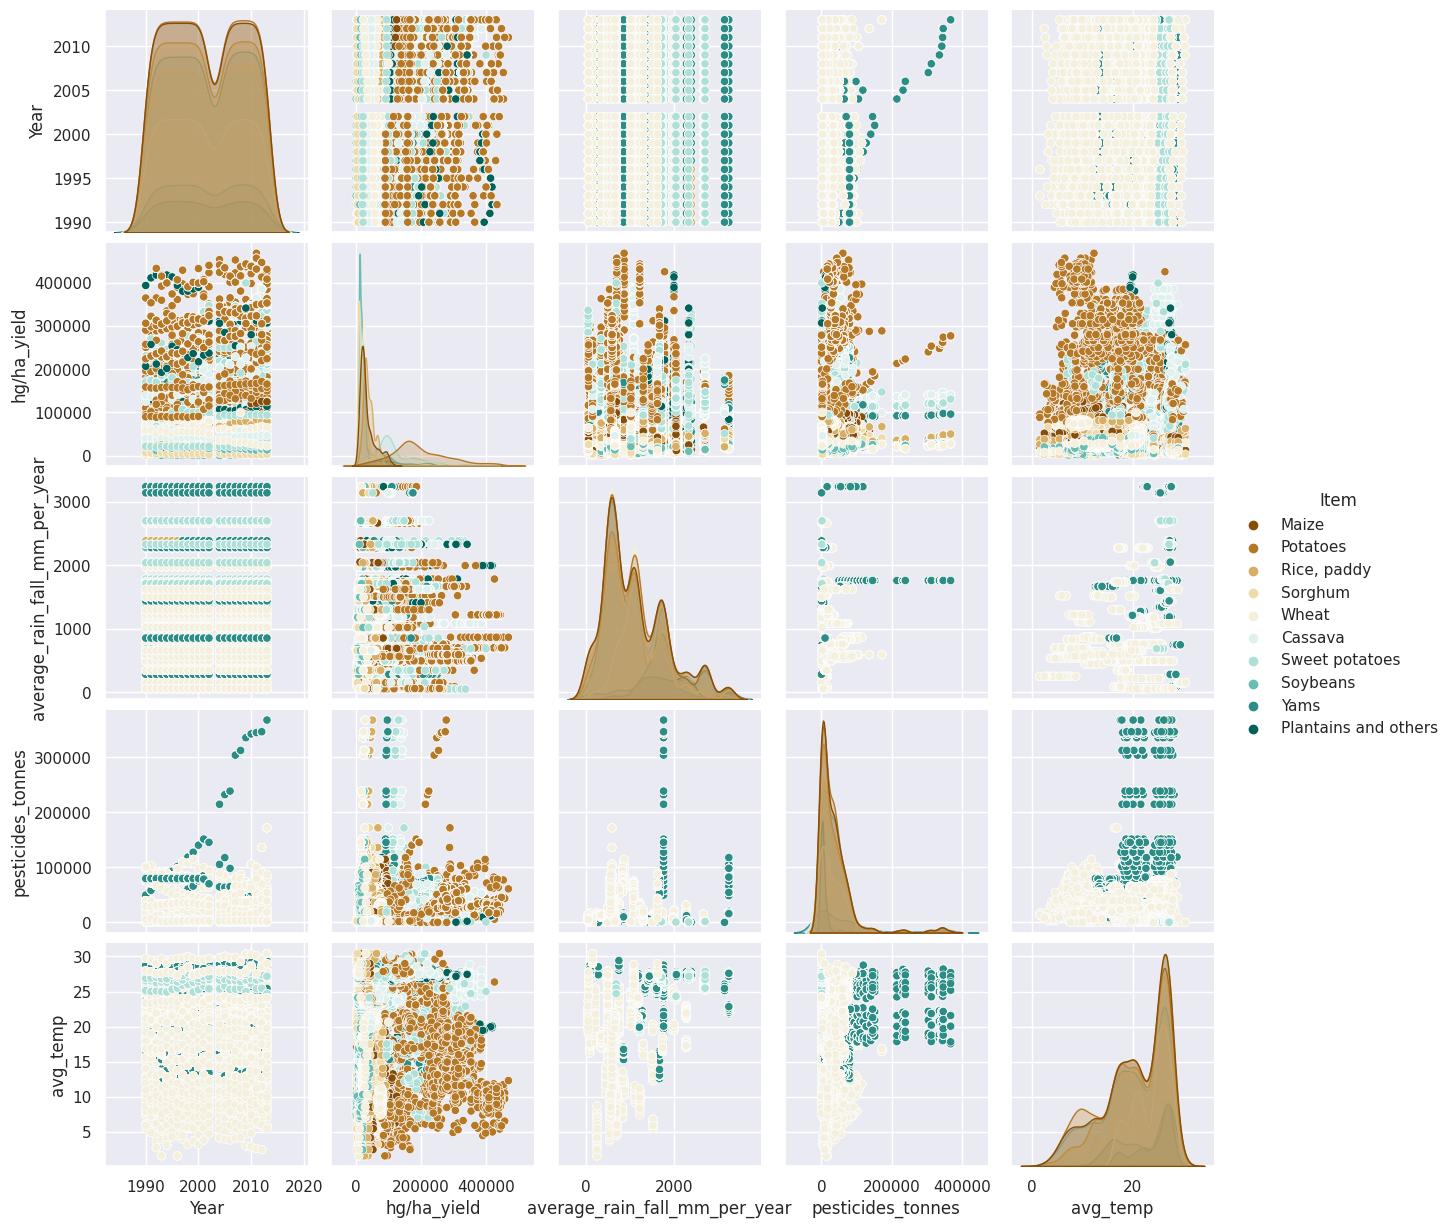

In [21]:
sns.pairplot(data=df,hue='Item',kind='scatter',palette='BrBG')

<Axes: xlabel='Year'>

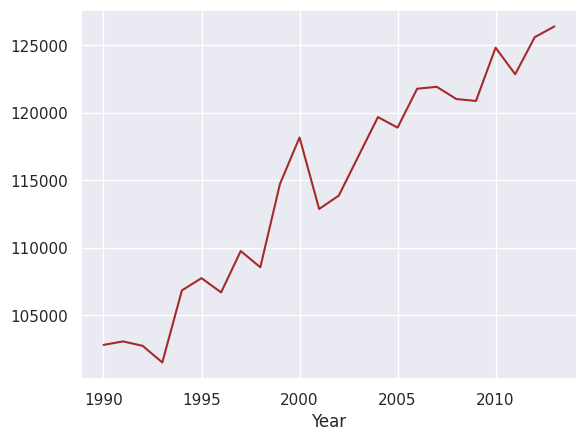

In [22]:
df2=df[df['Item']=='Yams']
df2.groupby('Year')['hg/ha_yield'].mean().plot(color='brown')

<div style="border-radius:10px; padding: 15px; background-color: #854720; font-size:115%; text-align:left">

<h2 align="left"><font color=#9eb413>Inferences:</font></h2>

* __Items__: 
    * __yams__: It appears that __yams__ uses __a lot__ of pesticides, grow on __all__ rainfall ranges.
    * __wheat__: __Wheat__ thrives on __all__ average temperature ranges and grows on __average to no__ rainfall.
* __year__:
    * __2003-2013__: Starting from 2003 to 2013, __more and more__ pesticides were used on __yams__ to **increase** its productivity.  
    
* __hg/ha_yield__: __Sorghum__ and __Soybeans__ are lowest in yield production while __potatoes__ are most popular.
    

In [23]:
geojson_url = "https://raw.githubusercontent.com/nvkelso/natural-earth-vector/master/geojson/ne_110m_admin_0_countries.geojson"
data = gpd.read_file(geojson_url)

merged_data = data.merge(df, left_on='NAME', right_on='Area', how='left')

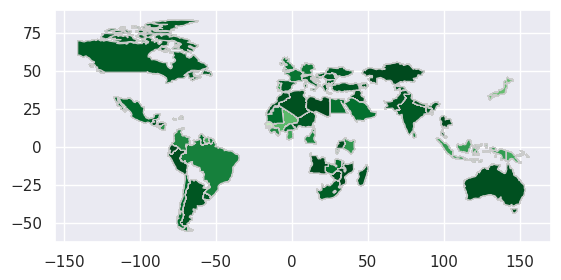

In [24]:
# fig, ax = plt.subplots(figsize=(15, 10))
merged_data.plot( column='hg/ha_yield', cmap='Greens_r', linewidth=0.8, edgecolor='0.8')
# plt.title("Countries")
plt.show()

In [25]:
del merged_data

In [26]:
del data

In [27]:
# import plotly.io as pio
# pio.renderers.default = 'notebook'

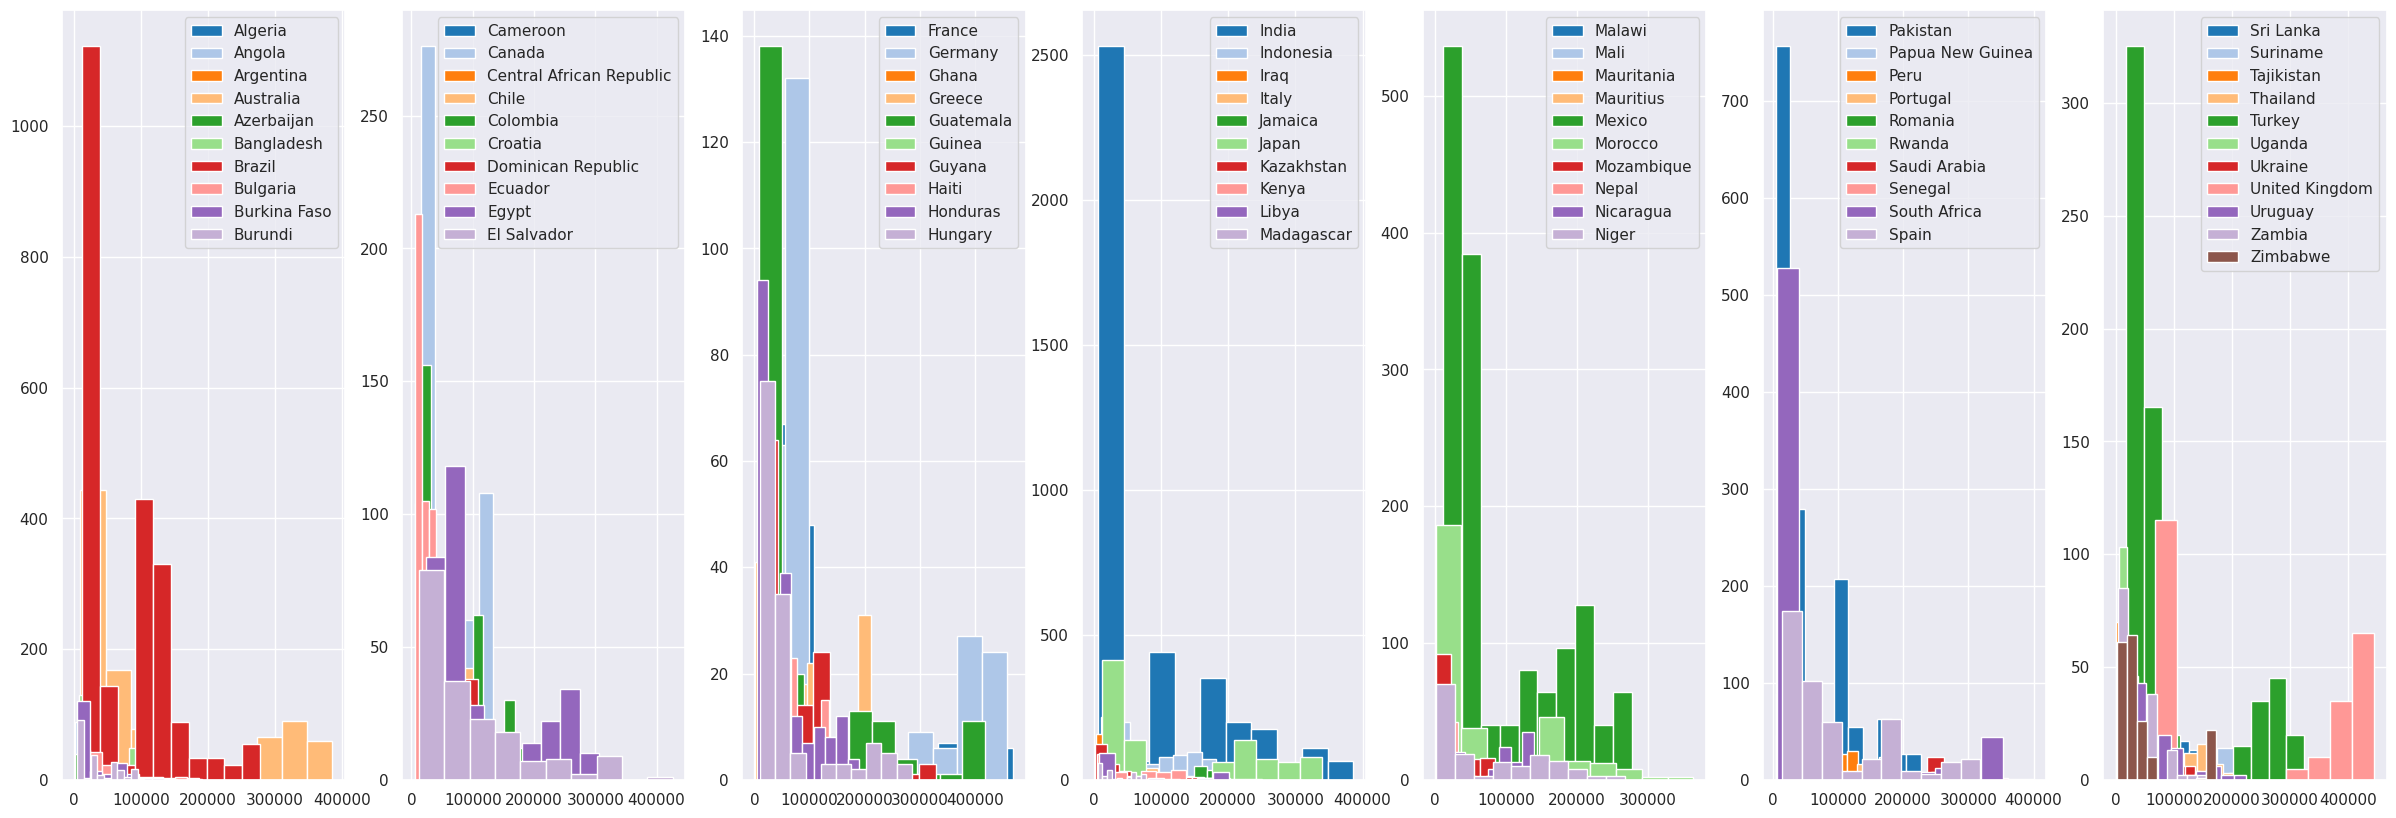

In [28]:
palette = sns.color_palette('tab20', 21,as_cmap=True)
num_plots = 7
areas_per_plot = 10

# Get unique areas 
unique_areas = sorted(df['Area'].unique())

# Split into chunks
area_chunks = [unique_areas[i:i+areas_per_plot] for i in range(0, len(unique_areas), areas_per_plot)]
area_chunks[-2] = unique_areas[-11:] 
fig, axs = plt.subplots(ncols=num_plots, figsize=(30, 10))
j=0
for i, ax in enumerate(axs):

    plot_df = df[df['Area'].isin(area_chunks[i])]
    for i, area in enumerate(plot_df['Area'].unique()):
       data = plot_df[plot_df['Area'] == area]
       ax.hist(data['hg/ha_yield'], facecolor=palette(i), label=area)

    ax.legend()
    j+=1
   
plt.show()

In [29]:
for i in range(0,7):
    plot_df = df[df['Area'].isin(area_chunks[i])]
    dk=plot_df.groupby(['Area','Item'])['hg/ha_yield'].mean().to_frame()
    dg=dk.sort_values(by=['hg/ha_yield'],ascending=True)
    display(dg.head())

hg/ha_yield
Area       Item                 
Angola     Sorghum   2926.769231
Azerbaijan Sorghum   3324.166667
Angola     Soybeans  4235.538462
           Maize     5753.869565
Azerbaijan Soybeans  7599.850000

hg/ha_yield
Area                     Item                  
Ecuador                  Wheat      7111.956522
Cameroon                 Soybeans   7566.782609
Central African Republic Sorghum    9353.913043
                         Maize     10250.869565
Cameroon                 Sorghum   11521.304348

hg/ha_yield
Area     Item                 
Honduras Wheat     5574.130435
Haiti    Maize     7905.565217
         Sorghum   8157.913043
Ghana    Sorghum  10291.347826
Honduras Sorghum  10863.782609

hg/ha_yield
Area       Item                 
Madagascar Soybeans  6267.173913
           Sorghum   6452.304348
Kenya      Sorghum   7744.478261
India      Sorghum   8452.434783
Libya      Wheat     8459.521739

hg/ha_yield
Area       Item                
Niger      Sorghum  2592.913043
Mauritania Sorghum  4673.869565
Mozambique Sorghum  4830.304348
Malawi     Sorghum  6403.086957
Morocco    Sorghum  6594.739130

hg/ha_yield
Area     Item                  
Pakistan Sorghum    6056.043478
Rwanda   Soybeans   6664.869565
Senegal  Sorghum    8159.173913
Pakistan Soybeans   9276.000000
Rwanda   Sorghum   10969.478261

hg/ha_yield
Area       Item                 
Tajikistan Soybeans   941.750000
Zimbabwe   Sorghum   3864.956522
Zambia     Sorghum   6809.608696
Thailand   Wheat     7547.000000
Suriname   Soybeans  9039.869565

In [30]:
for i in range(0,7):
    plot_df = df[df['Area'].isin(area_chunks[i])]
    dk=plot_df.groupby(['Area','Item'])['hg/ha_yield'].mean().to_frame()
    dg=dk.sort_values(by=['hg/ha_yield'],ascending=False)
    display(dg.head())

hg/ha_yield
Area      Item                         
Australia Potatoes        330944.826087
Argentina Potatoes        262059.173913
Australia Sweet potatoes  257610.826087
Brazil    Potatoes        196056.000000
Algeria   Potatoes        182413.956522

hg/ha_yield
Area        Item                               
Egypt       Sweet potatoes        261369.347826
            Potatoes              235444.956522
El Salvador Potatoes              211362.304348
            Plantains and others  198605.217391
Chile       Potatoes              184835.260870

hg/ha_yield
Area      Item                               
France    Potatoes              395037.260870
Germany   Potatoes              386553.347826
Guatemala Plantains and others  291096.304348
          Potatoes              241157.869565
Hungary   Potatoes              210372.782609

hg/ha_yield
Area  Item                         
Japan Potatoes        311005.260870
India Cassava         282234.434783
Italy Potatoes        237861.347826
Japan Sweet potatoes  237639.391304
      Yams            211343.434783

hg/ha_yield
Area      Item                         
Mexico    Potatoes        228553.695652
Morocco   Potatoes        217065.695652
Mauritius Potatoes        211356.869565
Mali      Potatoes        195653.869565
Mexico    Sweet potatoes  194611.913043

hg/ha_yield
Area             Item                   
South Africa     Potatoes  297195.434783
Spain            Potatoes  251421.695652
Saudi Arabia     Potatoes  223336.652174
Senegal          Potatoes  180499.608696
Papua New Guinea Yams      172521.173913

hg/ha_yield
Area           Item                               
United Kingdom Potatoes              406131.695652
Turkey         Potatoes              265486.565217
Suriname       Plantains and others  253966.913043
               Cassava               191282.478261
Tajikistan     Potatoes              176549.190476

In [31]:
dk=df.groupby(['Area','Item'])['hg/ha_yield'].mean().to_frame()
dk.sort_values(by=['hg/ha_yield'],ascending=False)

hg/ha_yield
Area           Item                   
United Kingdom Potatoes  406131.695652
France         Potatoes  395037.260870
Germany        Potatoes  386553.347826
Australia      Potatoes  330944.826087
Japan          Potatoes  311005.260870
...                                ...
Zimbabwe       Sorghum     3864.956522
Azerbaijan     Sorghum     3324.166667
Angola         Sorghum     2926.769231
Niger          Sorghum     2592.913043
Tajikistan     Soybeans     941.750000

[495 rows x 1 columns]

<div style="border-radius:10px; padding: 15px; background-color: #854720; font-size:115%; text-align:left">

<h2 align="left"><font color=#9eb413>Inferences:</font></h2>

* __Group 0__: __Australia__ produced the largest amount of yield harvesting __potatoes__ while __Angola__ has the least yield harvesting __sorghum__,__soybeans__ and __maize__.
* __Group 1__: __Egypt__ was producing most yield in this group growing __sweet potatoes__ and __potatoes__ while __Ecuador__ was struggling in harvesting __wheat__.
* __Group 2__: __France__ and __Germany__ are at the top of yield production both harvesting __potatoes__ while __Honduras__ wasn't in luck harvesting __wheat__
* __Group 3__: __India__ soared in growing __Cassava__ and __Japan__ was at the top growing __potatoes__ while __Madagascar__ struggled to grow __soybeans__ and __sorghum__.
* __Group 4__: __Morocco__ and __Mexico__ shined in yield production of __potatoes__ while __Niger__ failed to have high productions of __wheat__
* __Group 5__: __Pakistan__ was struggling in growing __sorghum__ while __South Africa__ __Spain__, and __Saudi Arabia__ shined in growing Potatoes 
* __Group 6__: __Tajikistan__ failed to harvest large amounts of __soybeans__ while __United Kingdom__ and __Turkey__ produced a myriad of __potatoes__
__Collectively__:
    * __Top__ producing countries: __United Kingdom, France, Germany, Australia, and Japan__ 
    * __Top__ produced Item: __potatoes__
    * __Least__ producing countries: __Zimbabwe, Azerbaijan, Angola, Niger, Tajikistan__ 
    * __Least__ produced item: __sorghum__ and __soybeans__

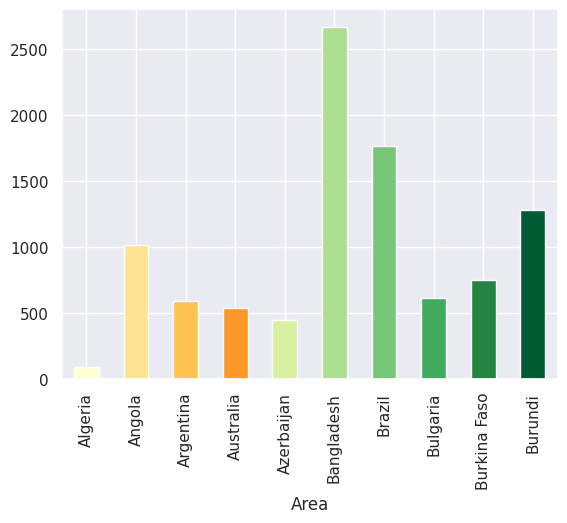

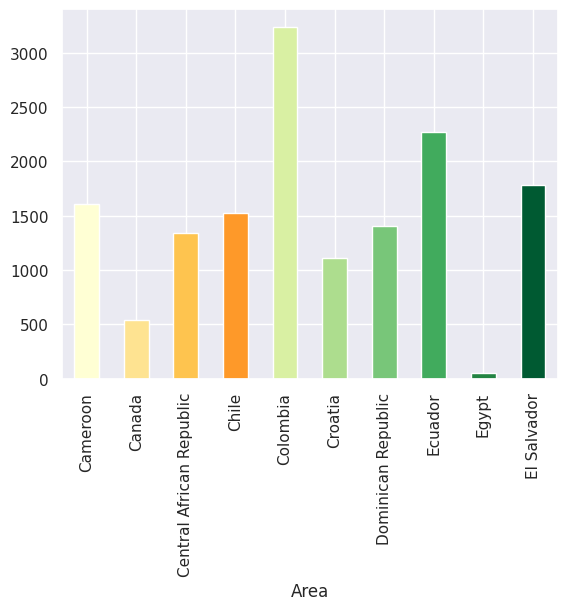

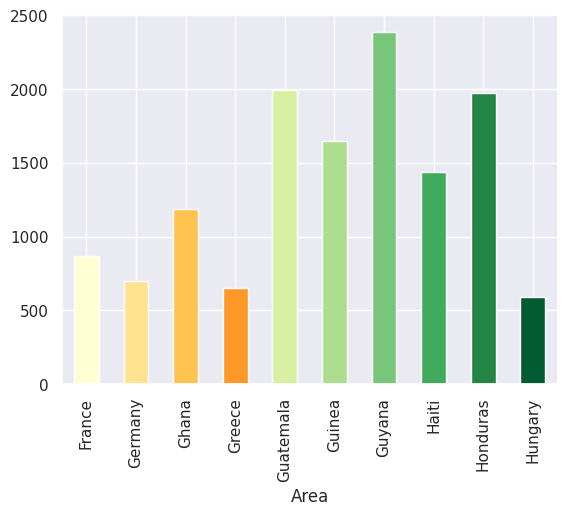

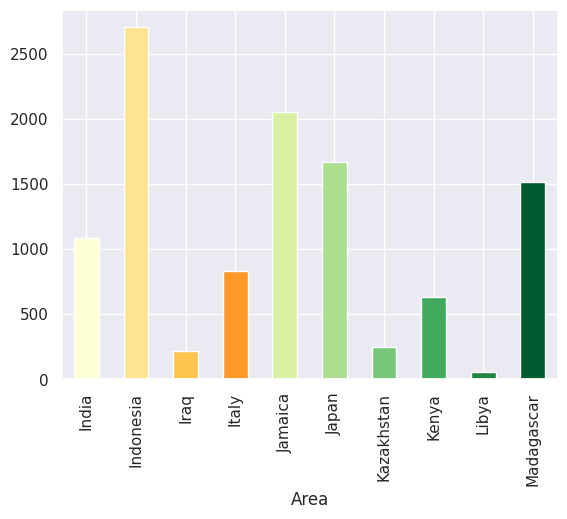

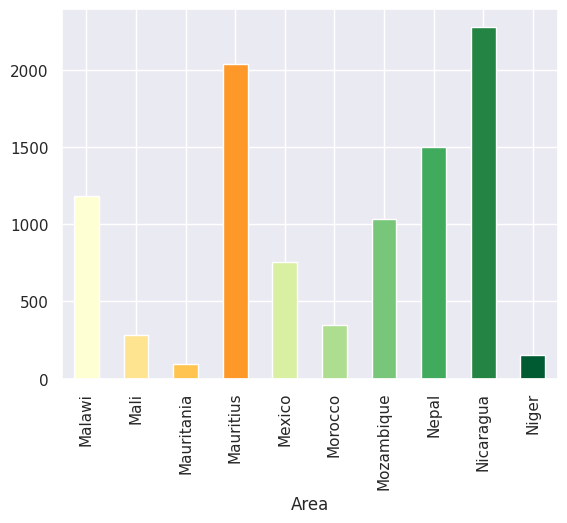

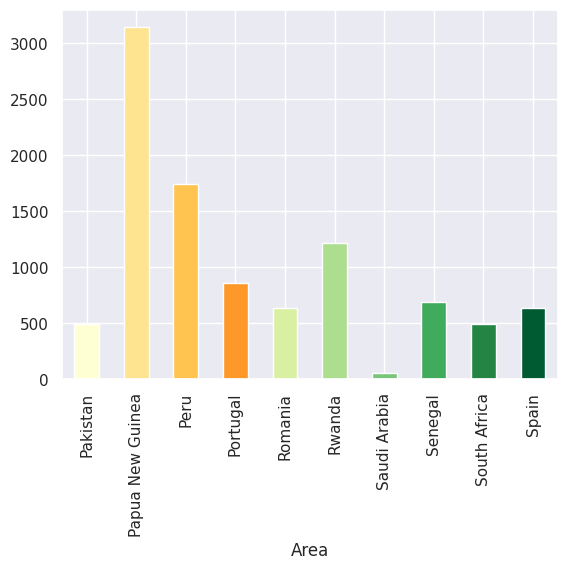

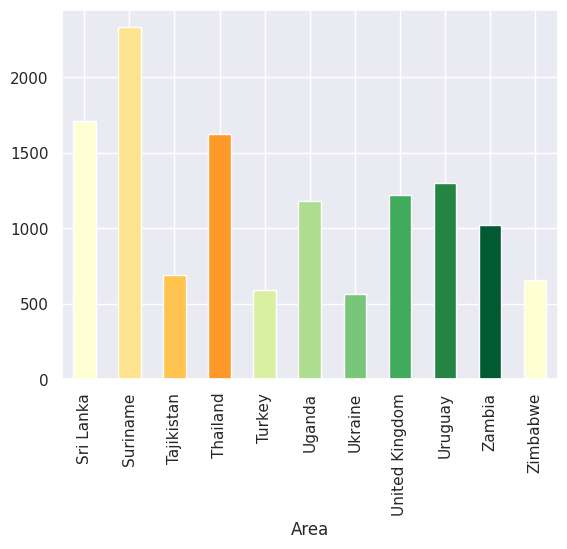

In [32]:
for i in range(0,7):
    plot_df = df[df['Area'].isin(area_chunks[i])]
    plot_df.groupby(['Area'])['average_rain_fall_mm_per_year'].mean().plot(kind='bar',rot=0,color=colorss.greens)
    plt.xticks(rotation=90)
    plt.show()


<div style="border-radius:10px; padding: 15px; background-color: #854720; font-size:115%; text-align:left">

<h2 align="left"><font color=#9eb413>Inferences:</font></h2>
    
*  __Top__ rainfall countries: __Bangladesh, Colombia, Guyana, Indonesia, Nicaragua, Papua New Guinea, Ecuador, and Suriname__ have rainfall with **over** **2000** mm
* __Least__ rainfall countries: __Saudi Arabia, Pakistan, South Africa, Mali, Mauritania, Morocco, Niger, Libya, Iraq, Egypt, Azerbaijan,and Algeria__ have rainfall with **less** than **500** mm

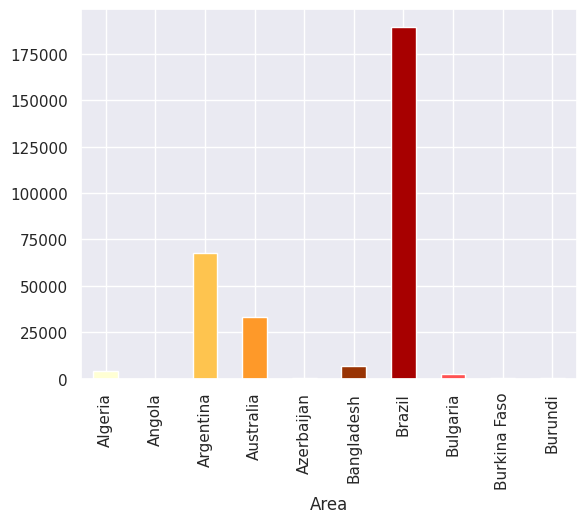

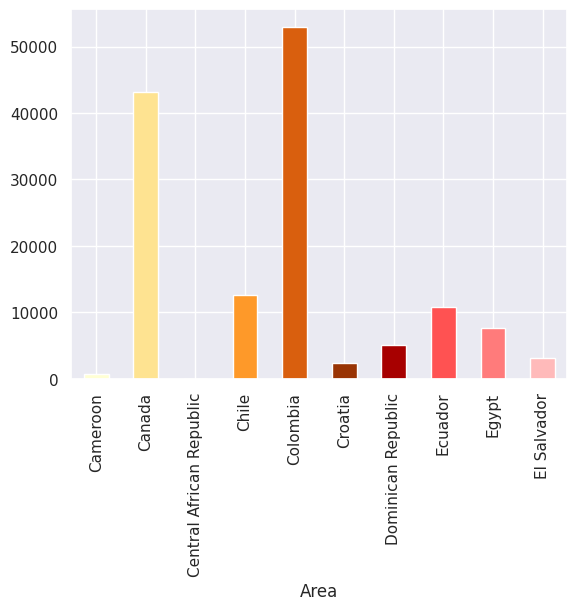

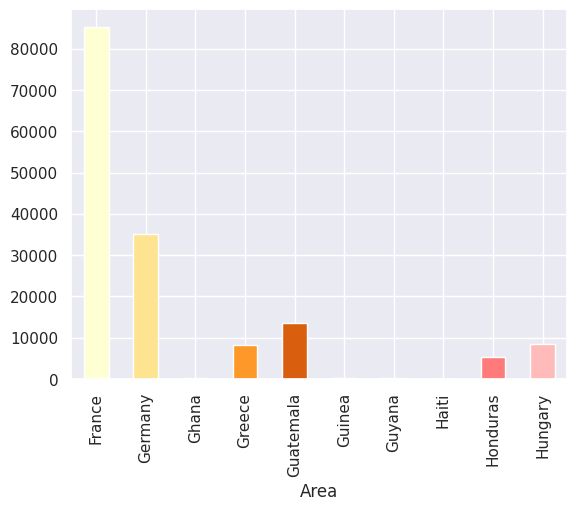

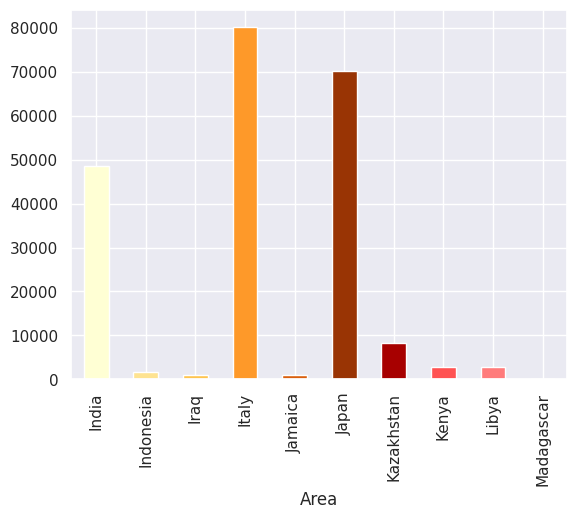

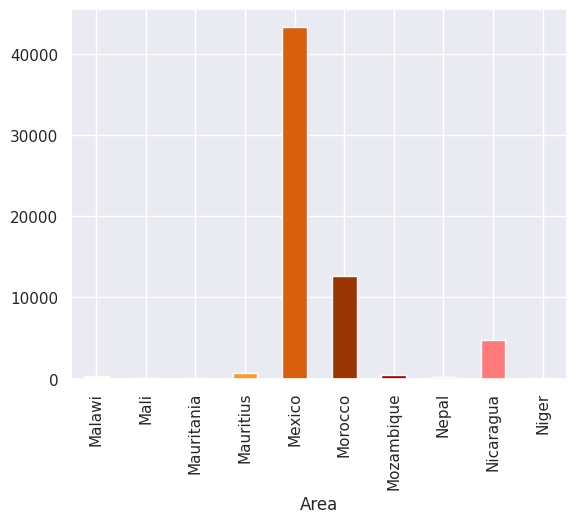

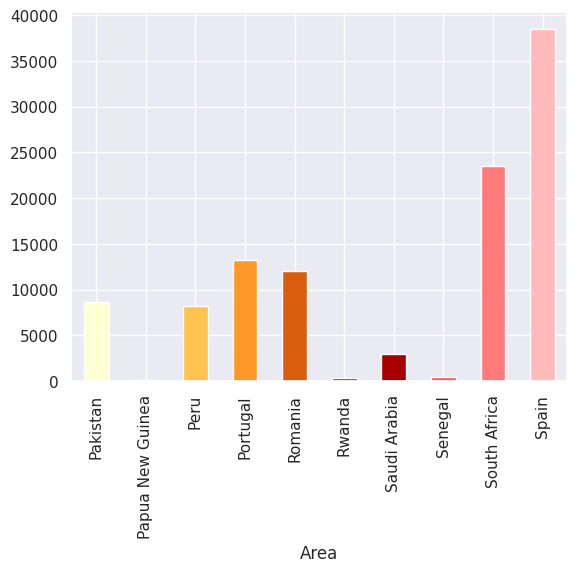

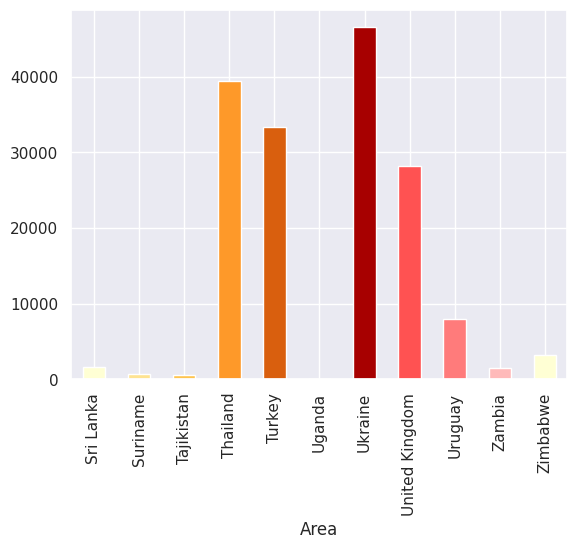

In [33]:
for i in range(0,7):
    plot_df = df[df['Area'].isin(area_chunks[i])]
    plot_df.groupby(['Area'])['pesticides_tonnes'].mean().plot(kind='bar',rot=0,color=colorss.yellows)
    plt.xticks(rotation=90)
    plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #854720; font-size:115%; text-align:left">

<h2 align="left"><font color=#9eb413>Inferences:</font></h2>
    
*  __Top__ pesticides using countries: __Brazil, Italy, Argentina__ 
    >__France:__ For a high yield producing country, using over __80000__ tonnes of pesticides could be harmful.
> > __Japan:__ Another high producing country using over __60000__ tonnes of pesticides.
    
* __Least__ pesticides using countries: __Algeria, Angola, Azerbaijan, Bulgaria, Burkina Faso, Burundi, Cameroon, Cenrral African Republic, Croatia, Egypt, El Salvador,Greece, Guinea, Guyana, Haiti, Honduras, Hungary, Indonesia, Iraq, Jamaica, Kenya, Kazakhstan, Libya, Madagascar, Malawi, Mali, Mauritana, Mauritius, Mozambique, Nepal, Niger, Papua New Guinea, Rwanda, Senegal, Saudi Arabia, Sri Lanka, Suriname, Tajikistan, Uganda, Zambia, Zimbabwe, Uruguay__ have been using pesticides with less than 10000 tonnes
> All **poorly** producing yield countries are included in **least** pesticides usage countries    
* **Germany, Australia, and United Kingdom** are top producing countries and they use an average amount of pesticides around **30000** tonnes

<h2 align="left"><font color=#9eb413>Now this begs the question; do pesticides affect yield production?</font></h2>

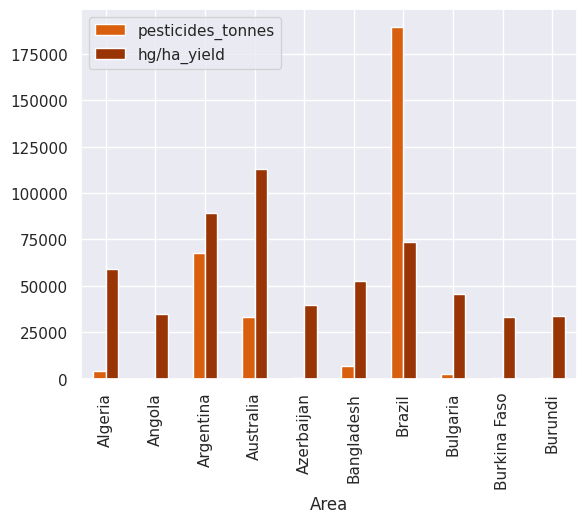

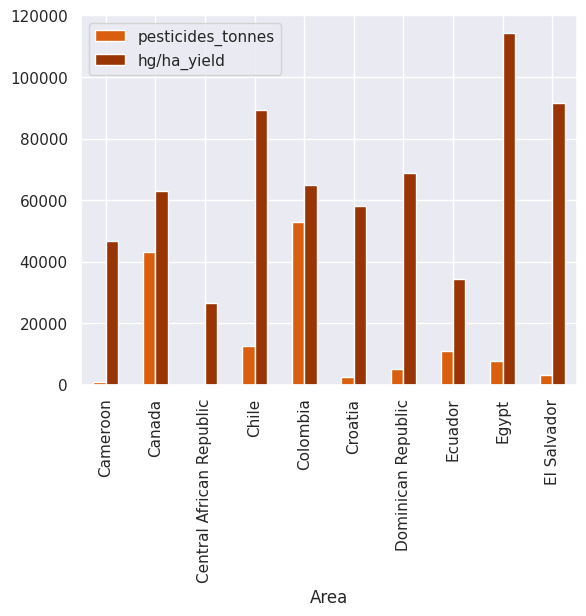

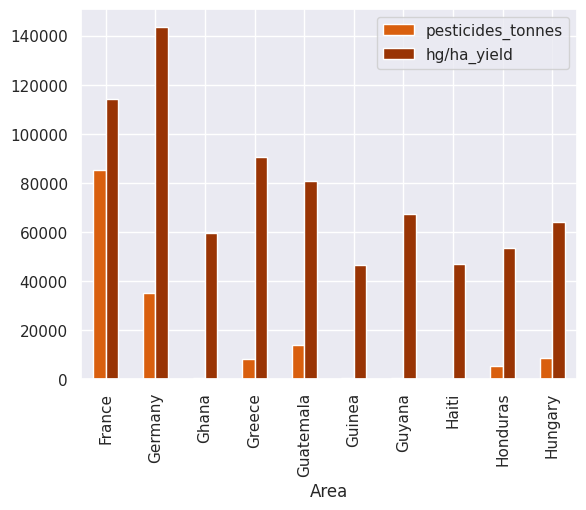

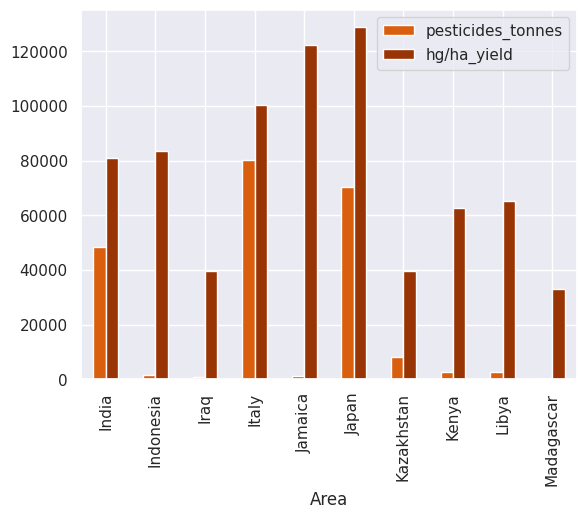

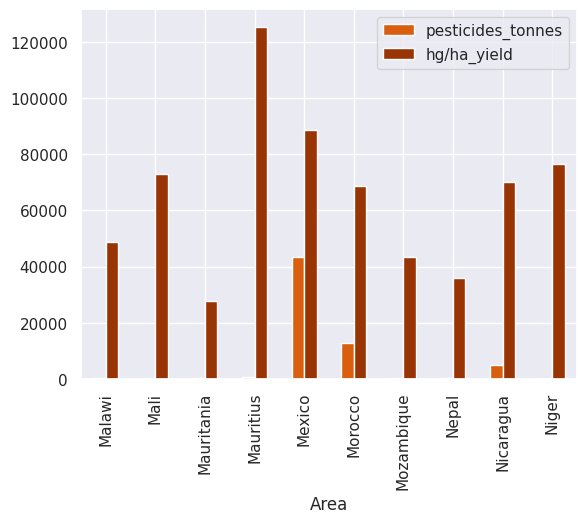

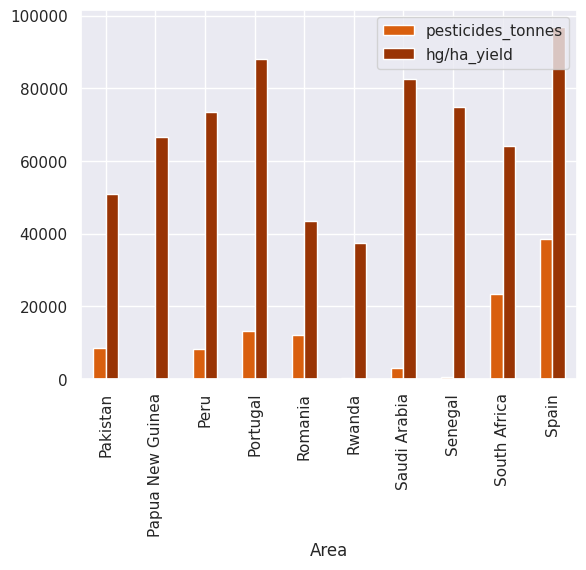

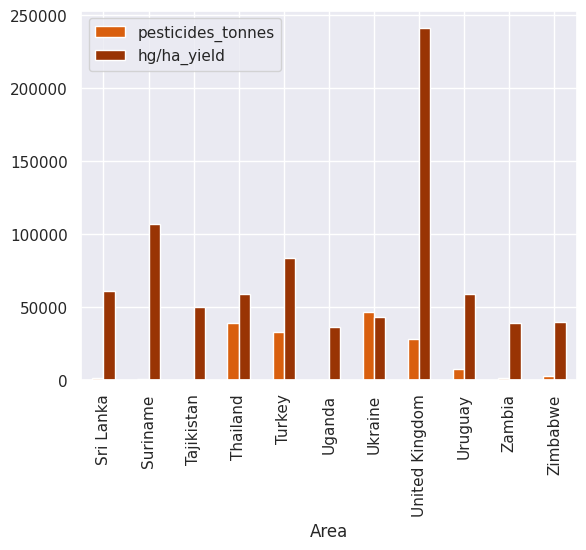

In [34]:
for i in range(0,7):
    plot_df = df[df['Area'].isin(area_chunks[i])]
    plot_df.groupby('Area')[['pesticides_tonnes', 'hg/ha_yield']].mean().plot(kind='bar',rot=0,color=colorss.yellows[-6:])
    plt.xticks(rotation=90)
    plt.show()

In [35]:
px.scatter(df, x='hg/ha_yield', y='pesticides_tonnes',color="Area",color_discrete_sequence=colorss.greens)


In [36]:
num_plots = 7
areas_per_plot = 10

# Get unique areas 
unique_areas = sorted(df['Area'].unique())

# Split into chunks
area_chunks = [unique_areas[i:i+areas_per_plot] for i in range(0, len(unique_areas), areas_per_plot)]
area_chunks[-2] = unique_areas[-11:]
fig, axs = plt.subplots(ncols=num_plots)
j=0
for i, ax in enumerate(axs):

    plot_df = df[df['Area'].isin(area_chunks[i])]
    
    ax = px.scatter(plot_df, x='hg/ha_yield', y='pesticides_tonnes',color="Area",color_discrete_sequence=colorss.greens)
    j+=1
   
    ax.show()
plt.clf()

<Figure size 640x480 with 0 Axes>

<div style="border-radius:10px; padding: 15px; background-color: #854720; font-size:115%; text-align:left">

<h2 align="left"><font color=#9eb413>Inferences:</font></h2>

* __Group 0__: 
    > __Brazil__ had low yield production and as it used more and more pesticides their production went **higher**.
       > > However, __Argentina__, __Australia__, and **Algeria** kept their pesticides usage __low__ and they had more yield production that __Brazil__ ever could.
* __Group 1__: 
  >  * **Colombia** kept having low yield production despite using more pesticides. It was almost constant despite the increased usage of pesticides.
  >  * **Canada** had one high yield production then went lower while using more pesticides until it had the same fate as **Colombia**
    > > **Egypt**, **El Salvador**, __Dominican Republic__, and **Chile** on the other hand, got very high yield productions while using a significantly **lower** amount of pesticides.
* __Group 2__: 
    > __France__ have high yield production despite its high pesticide usage as it is one of the leading yield production countries. Although, it lessened a little with more pesticides usage.
    > > __Germany__, __Guatemala__, and **Guyana** have high yield production while using less pesticides. even __Guatemala__ had higher production than __France__ at some point.
* __Group 3__: 
    > __India__ and __Japan__ have high yield productions while using less amounts of pesticides.  __India__ even beat __Japan__ in some yield productions while using less pesticides as well.
    > > __Italy__ however, is one of the countries that has the highest pesticides usage and its yield production wasn't as high as __India__ and __Japan__
* __Group 4__: 
    > __Mexico__ uses a significant amount of pesticides and its yield production kept increasing as more pesticides were used.
    > > * __Mali__, __Mauritius__, and __Niger__ had some high yield productions while using almost no pesticides which is impressive.
    > > * __Morocco__ kept using slightly more pesticides until it got a soaring 350k+ production then decreased slightly again.
    > > * __Nicaragua__ used more pesticides got to a maximum yield production then decreased again to an amount even lesser than it used to have before additional pesticides.
* __Group 5__:
    > * __Senegal__ got to a soaring 350k+ production while using almost no pesticides.
    > * __Saudi Arabia__ got high yield productions while using a small amount of pesticides.
    > * __Portugal__ got more yield productions while utilizing a little more pesticides until it reached a certain threshold and decreased again.
    > * __South Africa__ has a steady increase of yield production while adding more and more pesticides
    > > __Spain__ on the other hand, has some yield flunctuations but overall it is a high yield production. Although **Senegal** and **South Africa** beat it using less pesticides
* __Group 6__:
    > * __Tajikistan__ and __Suriname__ use almost no pesticides and they reached high amounts of yield productions. Even though __Tajikistan__ is one of the least producing countries but it has very high potential of being close to the top producing countries.
    > * __United Kingdom__ has high yield production and uses a fair amount of pesticides it's no surprise as it's one of the leading producing countries.
    > > * __Turkey__ has lesser yield productions than __United Kingdom__ and Suriname while utilizing more pesticides.
    > > *__Thailand__ and __Ukraine__ used way more pesticides and still their productions were lower than the above countries
    
     <h3 align="left"><font color=#9eb413>Conclusion:</font></h3>  

While using pesticides __increases__ yield production, there was an obvious __pattern__ happening.
    
   > Yield producion is at a considerable amomunt -> use __pesticides__ -> yield production **increases** -> comes to __maximum__ production -> yield gradually __decreases__ -> yield becomes even **less** than the starting yield amount no matter how many more pesticides the country uses.
    
* However, there were some exceptions to this __pattern__ such as __France__ and __Japan__ as they are top leading producing countries and other countries.
* You can **increase** production by using more pesticides but it is **temporary** nonetheless and in the **long run** it is better to use **less pesticides**.
* There were a lot of countries that showed **impressive** yield productions using almost **no** pesticides and this amount was **never** reached by other countries who do **use** pesticides. Those countries were __Senegal, Suriname, Tajikistan, Mali, Mauritius, Guyana, Algeria, and El Salvador__. They should focus more on **growing more crops** and businessmen should **invest** in growing crops in these countries as they have a very high **potential** in yield production of crops.
* Other countries who use a **tiny** amount of **pesticides** and still have **promising** yield productions are __Egypt, Chile, Morocco, South Africa, and Guatemala__. It is also recommended to **invest** in these countries as they have reassuring yield productions.
* The **perfect** amount of **pesticides** to use without having to go through the tedious **pattern** is **30k and below**.


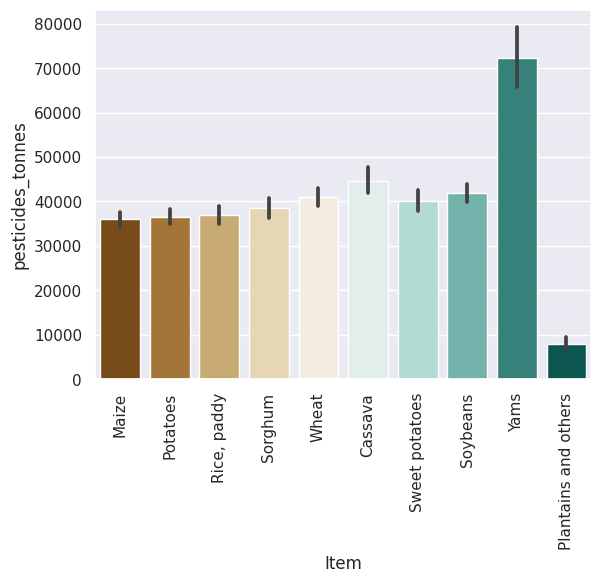

In [37]:
sns.barplot(data=df, x = df.Item, y = df['pesticides_tonnes'],palette='BrBG')
plt.xticks(rotation=90)
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #854720; font-size:115%; text-align:left">

<h2 align="left"><font color=#9eb413>Inferences:</font></h2>
    
*  __Top__ pesticides used on items: __Yams__
* __Least__ pesticides used on items: __Plantains and others__

<Axes: xlabel='Item', ylabel='hg/ha_yield'>

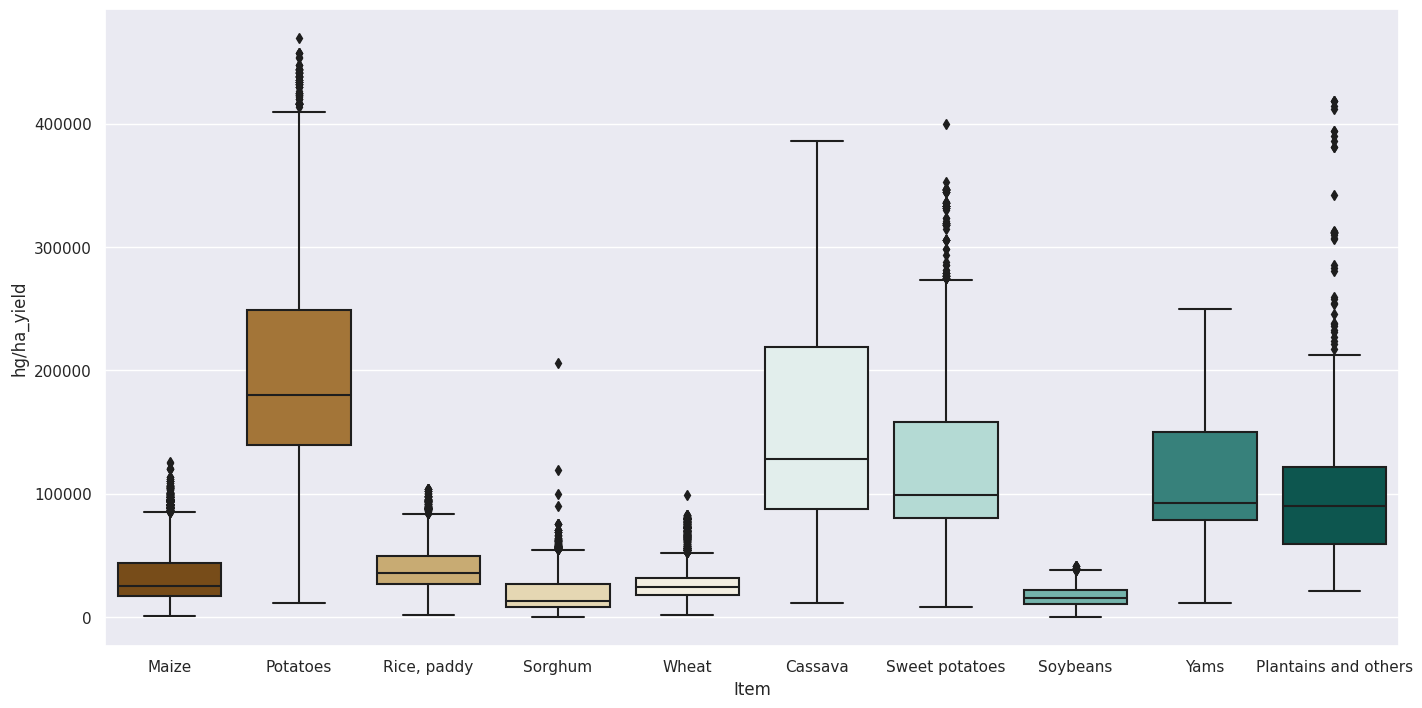

In [38]:
a4_dims = (16.7, 8.27)

fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(x="Item",y="hg/ha_yield",palette="BrBG",data=df,ax=ax)

<div style="border-radius:10px; padding: 15px; background-color: #854720; font-size:115%; text-align:left">

<h2 align="left"><font color=#9eb413>Inferences:</font></h2>
    
*  __Top__ producing items: __potatoes, cassava__
* __Least__ producing items: __soybeans, sorghum, wheat, maize, and rice, paddy__

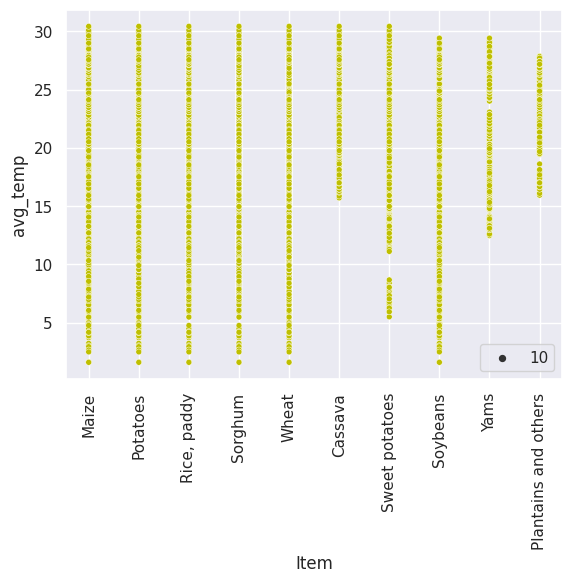

In [39]:
sns.scatterplot(x = 'Item', y = 'avg_temp', data = df,size=10,color='y')
plt.xticks(rotation=90);

<div style="border-radius:10px; padding: 15px; background-color: #854720; font-size:115%; text-align:left">

<h2 align="left"><font color=#9eb413>Inferences:</font></h2>

* __Cassava, Yams, and Plantains and others__ need more than 15 avg temperature to grow
* __all__ other items can grow at any temperature range

In [40]:
grouped = df.groupby('Item')

best_areas = []

for item, group in grouped:
    max_production_row = group[group['hg/ha_yield'] == group['hg/ha_yield'].max()]
    
    area = max_production_row['Area'].values[0]
    production = max_production_row['hg/ha_yield'].values[0]
    
    best_areas.append({'Item': item, 'Area': area, 'hg/ha_yield': production})

best_areas_df = pd.DataFrame(best_areas)

best_areas_df

Item        Area  hg/ha_yield
0               Cassava       India       385818
1                 Maize  Tajikistan       125670
2  Plantains and others   Guatemala       418505
3              Potatoes      France       468991
4           Rice, paddy   Australia       103895
5               Sorghum     Algeria       206000
6              Soybeans      Turkey        41609
7        Sweet potatoes     Senegal       400000
8                 Wheat      Zambia        99387
9                  Yams        Mali       250000

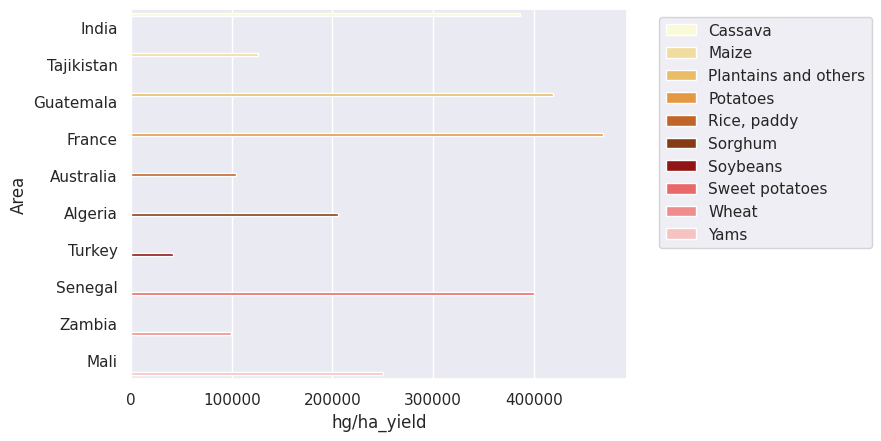

In [41]:
ax=sns.barplot(data=best_areas_df,x='hg/ha_yield',y='Area',hue='Item',palette=colorss.yellows)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #854720; font-size:115%; text-align:left">

<h2 align="left"><font color=#9eb413>Inferences:</font></h2>

* __Cassava__: __India__ is the top at producing __Cassava__
* __Maize__: __Tajikistan__ excels at growing __Maize__
* __PLantains and others__: __Guatemala__ is the best source of __PLantains and others__
* __Potatoes__: __France__ is the top at producing __potatoes__
* __Rice, paddy__: __Australia__ is the leading country in producing __rice, paddy__
* __Sorghum__: __Algeria__ excels at producing __sorghum__
* __Soybeans__: __Turkey__ is unrivalled in producing __soybeans__ 
* __Sweet potatoes__: __Senegal__ is the best at producing __sweet potatoes__
* __Wheat__: __Zambbia__ surpasses every country at producing __wheat__
* __Yams__: __Mali__ outshines all countries in growing __yams__

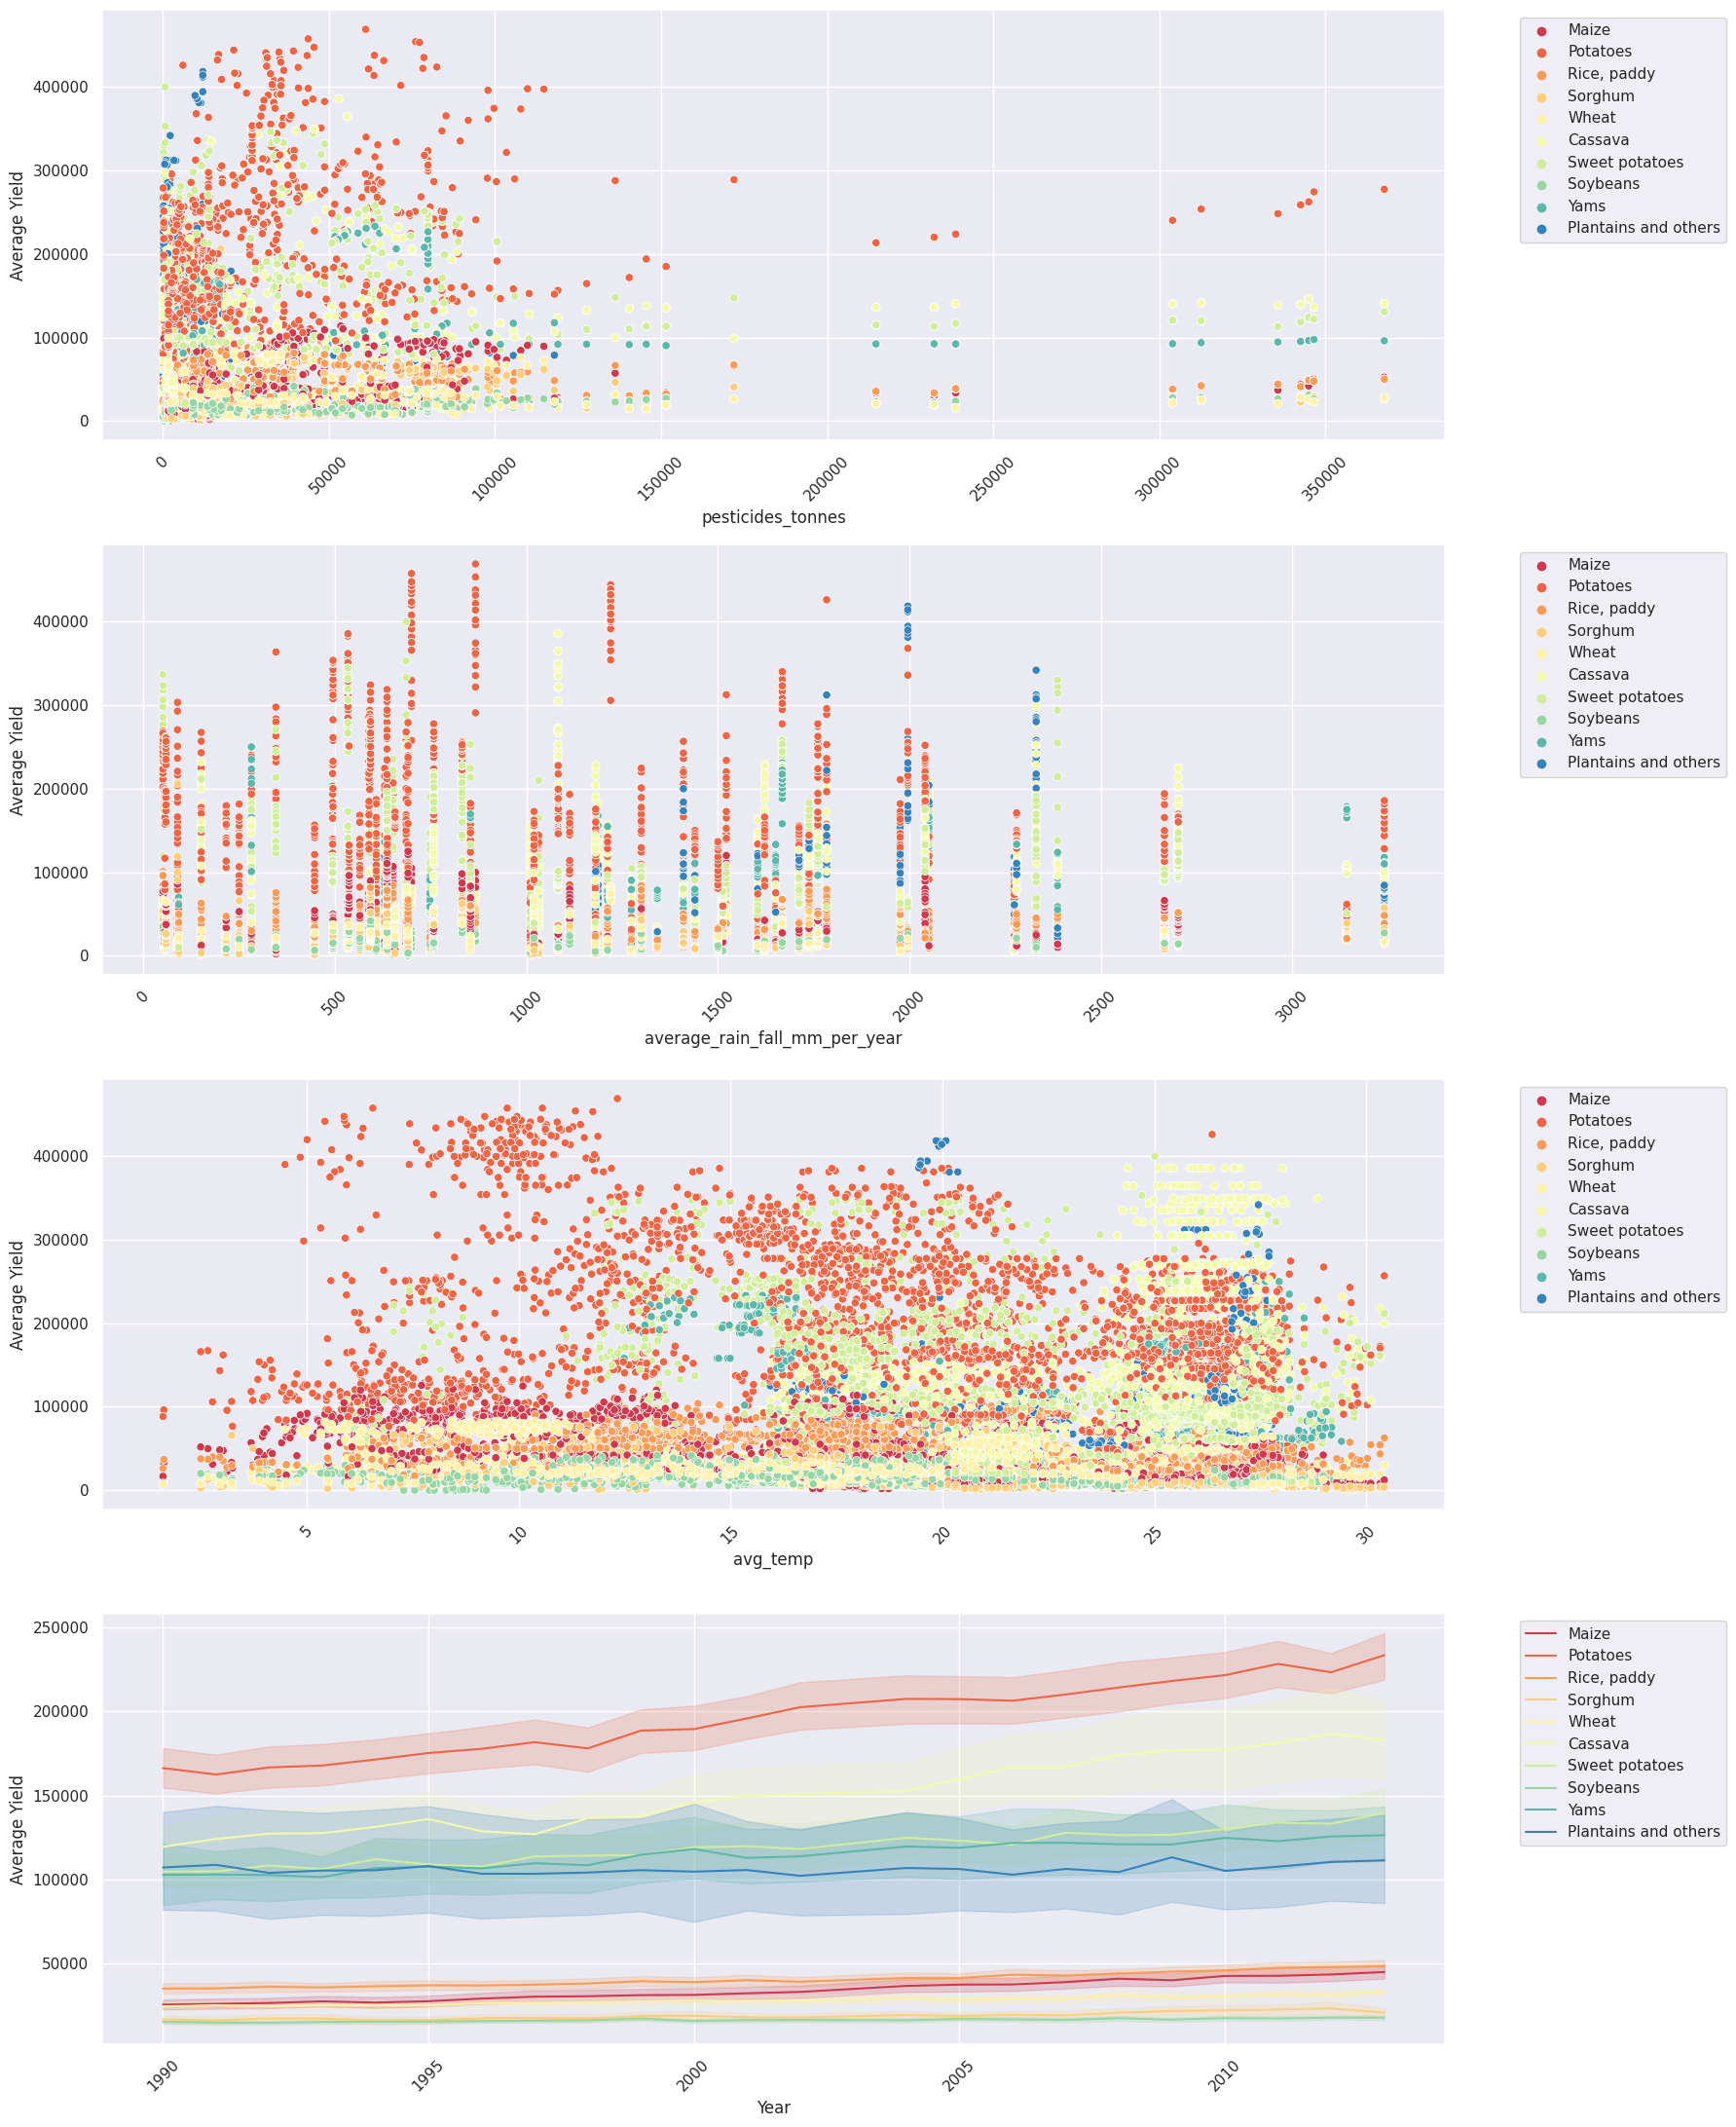

In [42]:
fig, axes = plt.subplots(4, 1, figsize=(18, 22))

sns.scatterplot(x = "pesticides_tonnes", y = "hg/ha_yield", hue = "Item", data = df, ax=axes[0], legend = True,palette='Spectral')
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_ylabel('Average Yield')
axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

sns.scatterplot(x = "average_rain_fall_mm_per_year", y = "hg/ha_yield", hue = "Item", data = df, ax=axes[1], legend = True,palette='Spectral')
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_ylabel('Average Yield')
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

sns.scatterplot(x = "avg_temp", y = "hg/ha_yield", hue = "Item", data = df, ax=axes[2], legend = True,palette='Spectral')
axes[2].tick_params(axis='x', rotation=45)
axes[2].set_ylabel('Average Yield')
axes[2].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

sns.lineplot(x = "Year", y = "hg/ha_yield", hue = "Item", data = df, ax=axes[3], legend = True,palette='Spectral')
axes[3].tick_params(axis='x', rotation=45)
axes[3].set_ylabel('Average Yield')
axes[3].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #854720; font-size:115%; text-align:left">

<h2 align="left"><font color=#9eb413>Inferences:</font></h2>
    
*  __pesticidies_tonnes__: it appears that production of items **decreases** as pesticides **increases**
* __rainfall__:  it appears that production of items **decreases** as rainfall **increases** for more than __2500__
* __avg_temp__: it shows that average yield **decreases** as average temperature **decreases** below __5__

    

In [43]:
def change_of_years(data, template='seaborn'):
    col = data.columns[3:].tolist()
    for i in col:
        sns.lineplot(data.groupby(['Year'])[i].mean(),color='brown')
        plt.title=f'Effect of Years on the {i}'
        

        plt.show()
        yield()

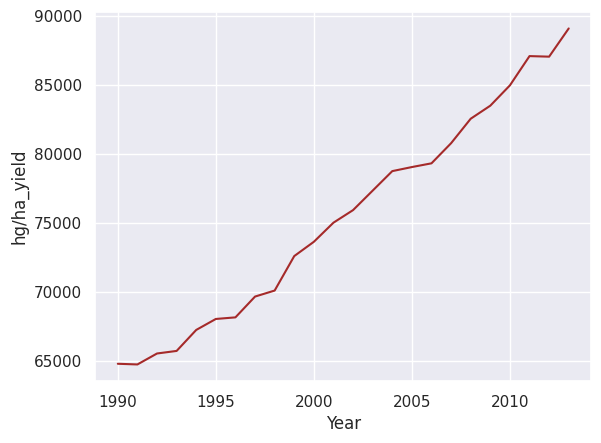

In [44]:
yplot = change_of_years(df)
next(yplot);

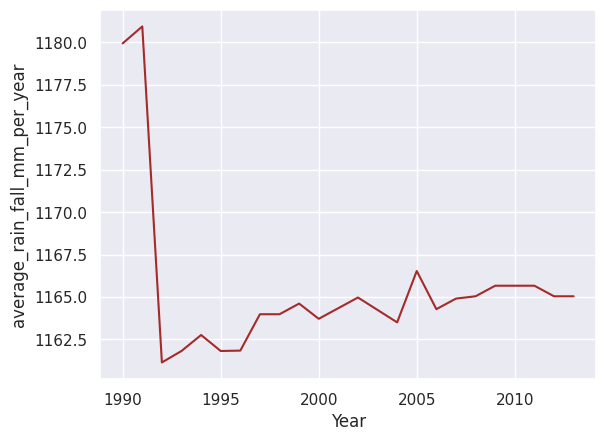

In [45]:
next(yplot);

<div style="border-radius:10px; padding: 15px; background-color: #854720; font-size:115%; text-align:left">

<h2 align="left"><font color=#9eb413>Inferences:</font></h2>
    
*  __pesticides__ have been **increasing** significantly since __2003__
    
    

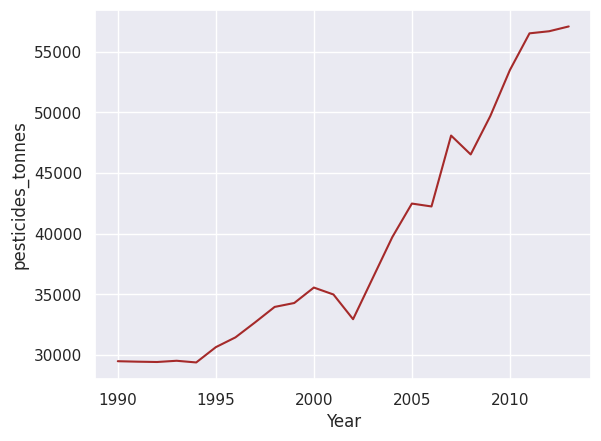

In [46]:
next(yplot);

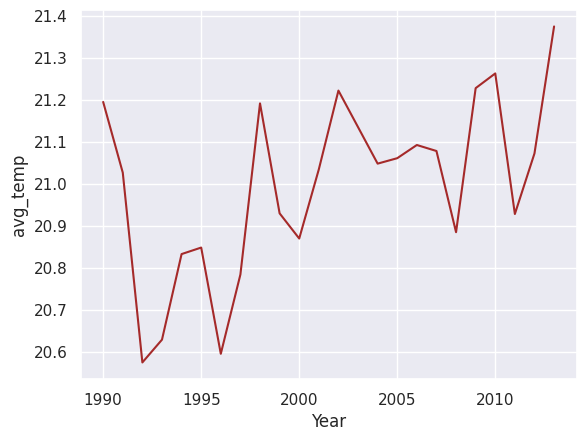

In [47]:
next(yplot);

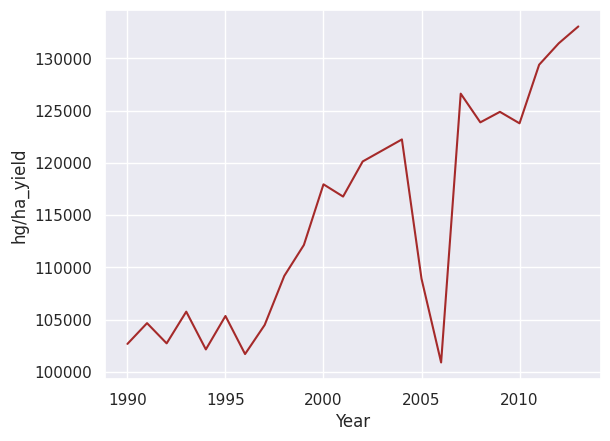

In [48]:
df_Egypt = df.loc[df['Area'] == 'Egypt']
yplot = change_of_years(df_Egypt)
next(yplot);

<div style="border-radius:10px; padding: 15px; background-color: #854720; font-size:115%; text-align:left">

<h2 align="left"><font color=#9eb413>Inferences:</font></h2>
    
*  A significant __decrease__ in pesticides occurred between __1993-2005__ then it **increased** even higher than its starting value

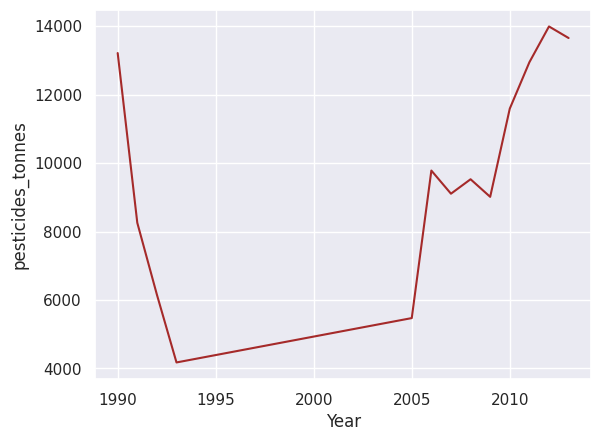

In [50]:
next(yplot);

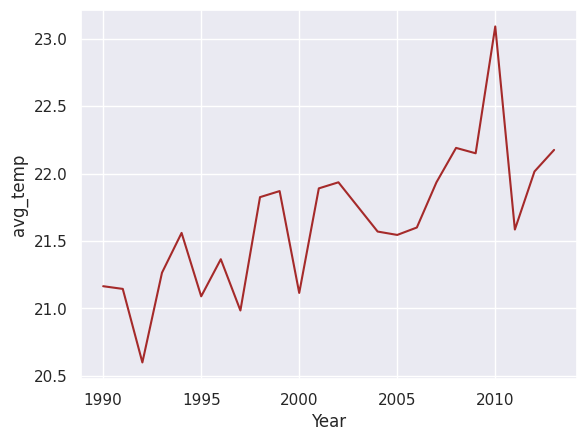

In [51]:
next(yplot);

<div style="border-radius:10px; padding: 15px; background-color: #854720; font-size:115%; text-align:left">

<h2 align="left"><font color=#9eb413>Inferences:</font></h2>

* Why this  happened in 2006
https://www.marefa.org/%D8%A7%D9%84%D8%B2%D8%B1%D8%A7%D8%B9%D8%A9_%D9%81%D9%8A_%D9%85%D8%B5%D8%B1

<a id="read"></a>
# <p style="background-color:#9eb413 ; font-family:calibri; color:#854720; font-size:150%; text-align:center; border-radius:15px 50px;">Step 5 | Model building and evaluation</p>


In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

In [53]:
X, y = datacorr.drop(labels='hg/ha_yield', axis=1), datacorr['hg/ha_yield']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

The accuracy of the Linear Regression Model Train is 7.39
The accuracy of the  Linear Regression Model Test is 7.37


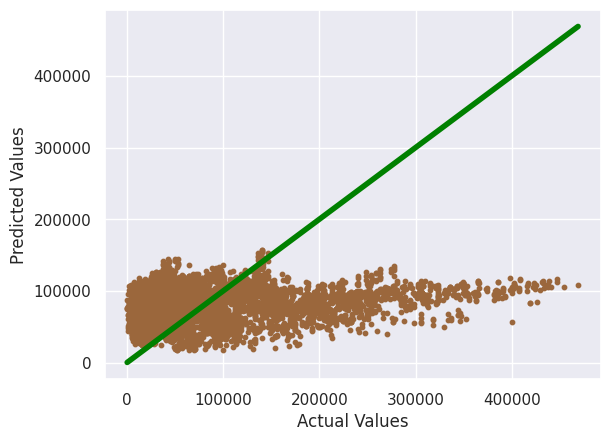

The accuracy of the Random Forest Model Train is 99.80
The accuracy of the  Random Forest Model Test is 98.56


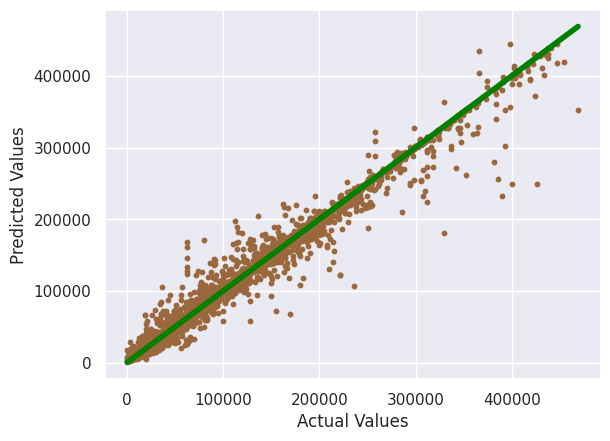

The accuracy of the Gradient Boost Model Train is 84.47
The accuracy of the  Gradient Boost Model Test is 83.11


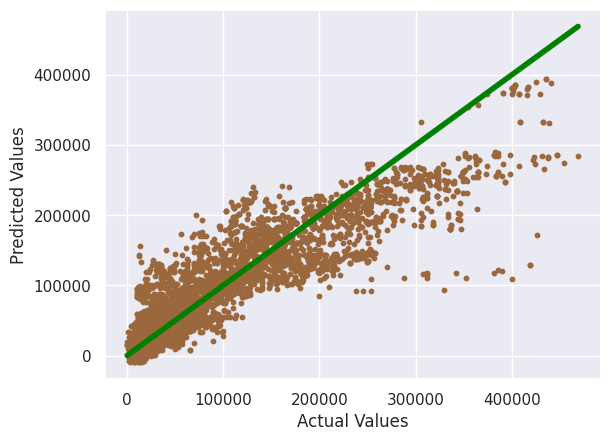

The accuracy of the XGBoost Model Train is 98.72
The accuracy of the  XGBoost Model Test is 97.33


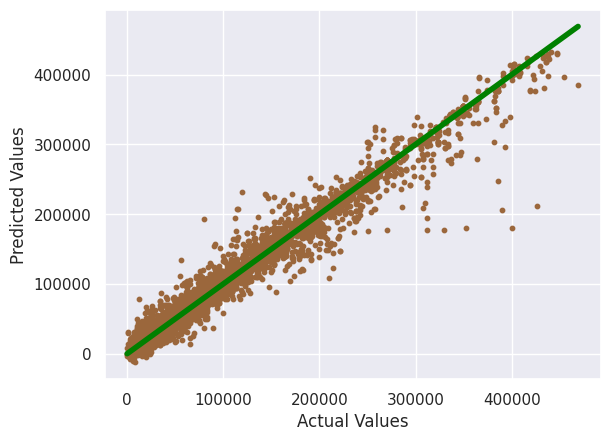

The accuracy of the KNN Model Train is 56.72
The accuracy of the  KNN Model Test is 28.82


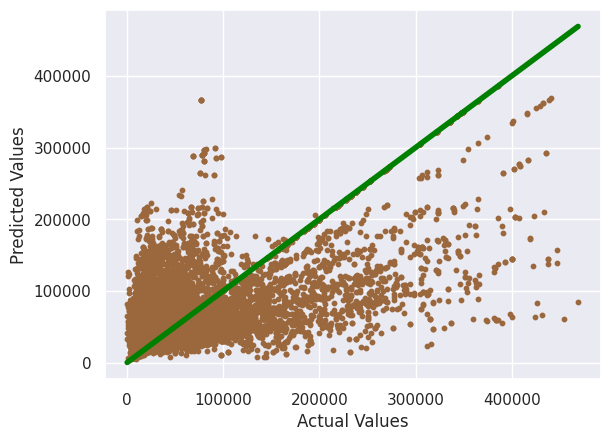

The accuracy of the Decision Tree Model Train is 100.00
The accuracy of the  Decision Tree Model Test is 97.62


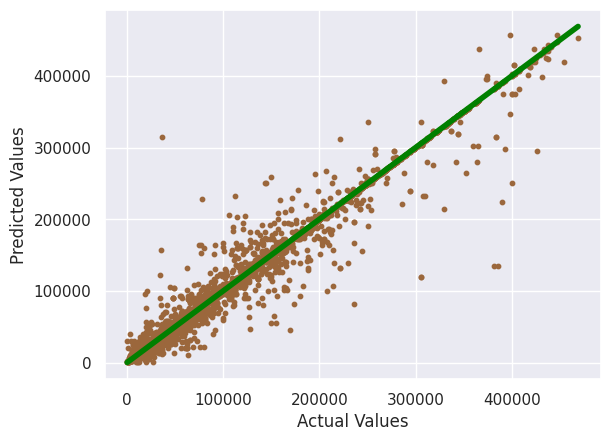

The accuracy of the Bagging Regressor Model Train is 99.81
The accuracy of the  Bagging Regressor Model Test is 98.59


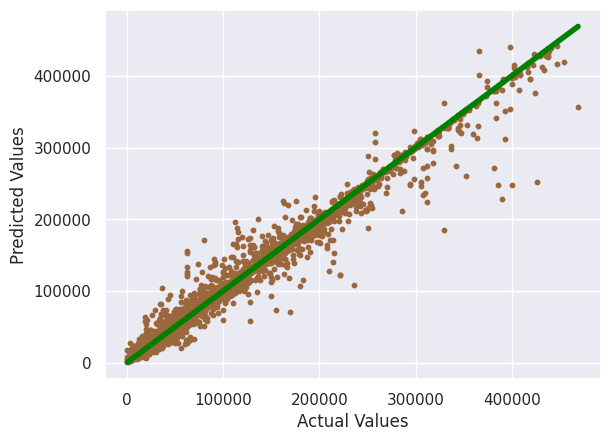

In [71]:

results = []

models = [
    ('Linear Regression', LinearRegression()),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Gradient Boost', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3,random_state=42)),
    ('XGBoost', XGBRegressor(random_state=42)),
    ('KNN',KNeighborsRegressor(n_neighbors=5)),
    ('Decision Tree',DecisionTreeRegressor(random_state=42)),
    ('Bagging Regressor',BaggingRegressor(n_estimators=150, random_state=42))
          ]

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = model.score(X_test, y_test)
    MSE = mean_squared_error(y_test, y_pred)
    R2_score = r2_score(y_test, y_pred)
    results.append((name, accuracy, MSE, R2_score))
    acc = (model.score(X_train , y_train)*100)
    print(f'The accuracy of the {name} Model Train is {acc:.2f}')
    acc =(model.score(X_test , y_test)*100)
    print(f'The accuracy of the  {name} Model Test is {acc:.2f}')    
    plt.scatter(y_test, y_pred,s=10,color='#9B673C')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
#     plt.title(f' {name} Evaluation')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='green', linewidth = 4)
    plt.show()

dff = pd.DataFrame(results, columns=['Model', 'Accuracy', 'MSE', 'R2_score'])
df_styled_best = dff.style.highlight_max(subset=['Accuracy','R2_score'], color='green').highlight_min(subset=['MSE'], color='green').highlight_max(subset=['MSE'], color='red').highlight_min(subset=['Accuracy','R2_score'], color='red')

# df_styled_worst = dff.style.highlight_max(subset=['MSE'], color='red').highlight_min(subset=['Accuracy','R2_score'], color='red')

display(df_styled_best)
# display(df_styled_worst)

# Kefold

In [78]:
results = []

models = [
    ('Linear Regression', LinearRegression()),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Gradient Boost', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3,random_state=42)),
    ('XGBoost', XGBRegressor(random_state=42)),
    ('KNN',KNeighborsRegressor(n_neighbors=5)),
    ('Decision Tree',DecisionTreeRegressor(random_state=42)),
    ('Bagging Regressor',BaggingRegressor(n_estimators=150, random_state=42))
          ]

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = model.score(X_test, y_test)
    MSE = mean_squared_error(y_test, y_pred)
    MAE = mean_absolute_error(y_test, y_pred)
    MAPE = mean_absolute_percentage_error(y_test, y_pred)
    R2_score = r2_score(y_test, y_pred)
    results.append((name, accuracy, MSE, MAE, MAPE, R2_score))
    
    print(name)
    num_folds = 5
    kf = KFold(n_splits=num_folds, shuffle=True)
    scores = cross_val_score(model, X, y, cv=kf)

    for fold, score in enumerate(scores):
        print(f"Fold {fold+1}: {score}")

    mean_score = np.mean(scores)
    print(f"Mean Score: {mean_score}")
    print('-'*30)
        

df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'MSE', 'MAE', 'MAPE', 'R2_score'])
df_styled_best = df.style.highlight_max(subset=['Accuracy','R2_score'], color='lightblue').highlight_min(subset=['MSE','MAE','MAPE'], color='lightblue').highlight_max(subset=['MSE','MAE','MAPE'], color='red').highlight_min(subset=['Accuracy','R2_score'], color='red')

display(df_styled_best)

Fold 1: 0.9869702277321173
Fold 2: 0.9894080486330636
Fold 3: 0.9902590732299358
Fold 4: 0.987126992234344
Fold 5: 0.9886464865630816
Mean Score: 0.9884821656785086
------------------------------
Gradient Boost
Fold 1: 0.8397791952821909
Fold 2: 0.8438480984702624
Fold 3: 0.8399674451313388
Fold 4: 0.8371614193399575
Fold 5: 0.835120237640662
Mean Score: 0.8391752791728824
------------------------------
XGBoost
Fold 1: 0.9784825962052269
Fold 2: 0.9745812973831376
Fold 3: 0.9755973032964937
Fold 4: 0.9722117907482749
Fold 5: 0.9789145888178177
Mean Score: 0.9759575152901903
------------------------------
KNN
Fold 1: 0.3671583453939745
Fold 2: 0.32717950753058767
Fold 3: 0.29626803210964847
Fold 4: 0.37517092032212096
Fold 5: 0.3253672339012301
Mean Score: 0.3382288078515124
------------------------------
Decision Tree
Fold 1: 0.9801010778930631
Fold 2: 0.9813819180006477
Fold 3: 0.9721478506102322
Fold 4: 0.9755767779479514
Fold 5: 0.9782051425518004
Mean Score: 0.977482553400739
-----